# Advanced Dialogue Analysis of Subtitles Data

In this analysis, we will examine the dialogues from a subtitles dataset using advanced NLP techniques. Our objectives are to perform topic modeling, word frequency analysis, named entity recognition, and sentiment analysis over time.

## Importing Necessary Libraries

First, we need to import the necessary libraries for our analysis.


In [1]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora, models
import spacy

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Loading and Preprocessing Subtitles Data

Next, we will load and preprocess the subtitles data. We will parse the text file and extract the dialogues.


In [2]:
# Load the dataset
with open('dataset.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Create a DataFrame
df = pd.DataFrame({
    'Dialogue': [line.strip() for line in lines if line.strip()]
})

df.head()


Dialogue
0  ﻿Fearsome monsters... Exotic creatures...
1         Vast riches... Hidden treasures...
2       Evil enclaves... Unexplored lands...
3            The word "unknown" holds magic.
4             And some incredible people are

## Word Frequency Analysis

Let's analyze the frequency of words used in the dialogues.


In [3]:
from nltk.corpus import stopwords
from collections import Counter

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Filtered_Dialogue'] = df['Dialogue'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Calculate word frequencies
all_words = ' '.join(df['Filtered_Dialogue']).split()
word_freq = Counter(all_words)

# Display the most common words
word_freq.most_common(20)


[("i'm", 1144),
 ('one', 966),
 ("i'll", 876),
 ("that's", 795),
 ('would', 616),
 ("can't", 603),
 ('x', 602),
 ("he's", 579),
 ('get', 537),
 ('must', 522),
 ('take', 501),
 ('use', 499),
 ('like', 483),
 ('you.', 465),
 ('gon', 453),
 ('want', 449),
 ('know', 441),
 ('it.', 431),
 ('huh?', 430),
 ('need', 416)]

## Topic Modeling

We will use LDA (Latent Dirichlet Allocation) to identify topics within the dialogues.


In [4]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# Tokenize the dialogues
df['Tokenized_Dialogue'] = df['Filtered_Dialogue'].apply(nltk.word_tokenize)

# Create a dictionary and corpus for LDA
dictionary = Dictionary(df['Tokenized_Dialogue'])
corpus = [dictionary.doc2bow(text) for text in df['Tokenized_Dialogue']]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")


Topic: 0
Words: 0.125*"." + 0.120*"," + 0.028*"!" + 0.020*"king" + 0.011*"yes" + 0.011*"still" + 0.011*"use" + 0.011*"yeah" + 0.011*"here" + 0.010*"well"

Topic: 1
Words: 0.086*"." + 0.086*"," + 0.068*"..." + 0.028*"!" + 0.023*"me" + 0.016*"would" + 0.013*"want" + 0.012*"see" + 0.011*"us" + 0.011*"pitou"

Topic: 2
Words: 0.165*"." + 0.057*"i" + 0.032*"'ll" + 0.031*"!" + 0.027*"'m" + 0.014*"you" + 0.010*"power" + 0.009*"okay" + 0.008*"like" + 0.008*"take"

Topic: 3
Words: 0.150*"?" + 0.063*"!" + 0.052*"," + 0.036*"..." + 0.028*"it" + 0.025*"'s" + 0.022*"gon" + 0.020*"killua" + 0.018*"n't" + 0.017*"ca"

Topic: 4
Words: 0.114*"." + 0.066*"'s" + 0.055*"," + 0.023*"..." + 0.020*"time" + 0.019*"that" + 0.016*"he" + 0.014*"x" + 0.014*"let" + 0.013*"now"



## Named Entity Recognition (NER)

Using spaCy, we will perform Named Entity Recognition to identify entities in the dialogues.


In [7]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Perform NER
def get_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

df['Entities'] = df['Dialogue'].apply(get_entities)
df.head()


Dialogue  \
0  ﻿Fearsome monsters... Exotic creatures...   
1         Vast riches... Hidden treasures...   
2       Evil enclaves... Unexplored lands...   
3            The word "unknown" holds magic.   
4             And some incredible people are   

                           Filtered_Dialogue  \
0  ﻿fearsome monsters... exotic creatures...   
1         vast riches... hidden treasures...   
2       evil enclaves... unexplored lands...   
3                word "unknown" holds magic.   
4                          incredible people   

                                  Tokenized_Dialogue         Entities  
0  [﻿fearsome, monsters, ..., exotic, creatures, ...               []  
1        [vast, riches, ..., hidden, treasures, ...]  [(Hidden, GPE)]  
2      [evil, enclaves, ..., unexplored, lands, ...]               []  
3           [word, ``, unknown, '', holds, magic, .]               []  
4                               [incredible, people]               []

## Sentiment Analysis Over Time

We will perform sentiment analysis and plot sentiment scores over time to observe how the emotional tone changes throughout the dataset.


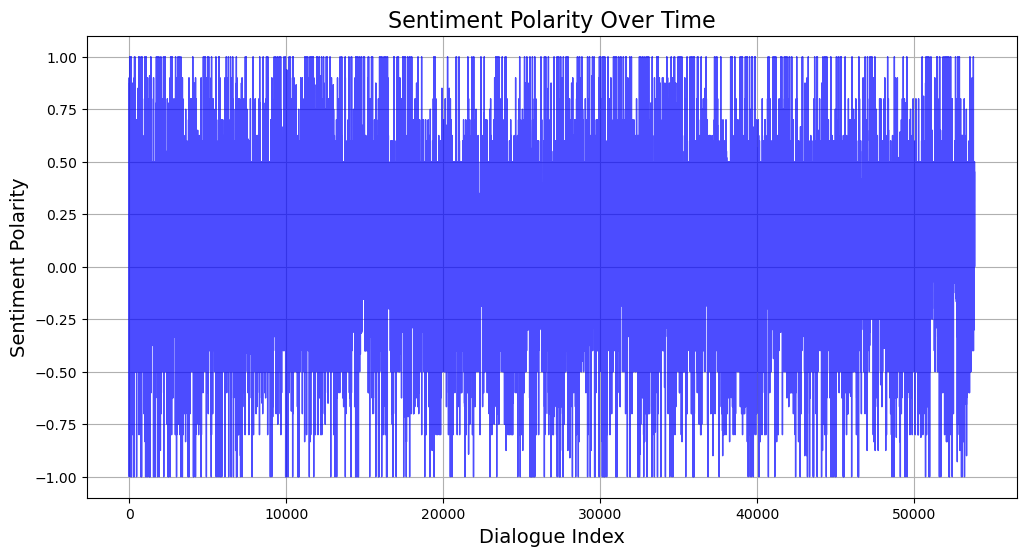

In [12]:
import plotly.express as px
import plotly.graph_objs as go

# Perform sentiment analysis
df['Sentiment_Polarity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plot sentiment polarity over time
plt.figure(figsize=(12, 6))
plt.plot(df['Sentiment_Polarity'], color='blue', linewidth=1, alpha=0.7)
plt.title('Sentiment Polarity Over Time', fontsize=16)
plt.xlabel('Dialogue Index', fontsize=14)
plt.ylabel('Sentiment Polarity', fontsize=14)
plt.grid(True)
plt.show()



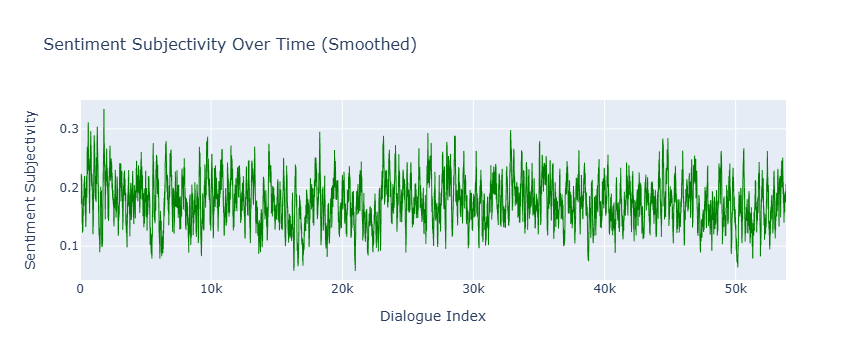

In [13]:
# Perform sentiment analysis
df['Sentiment_Subjectivity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Apply a rolling average to smooth the data
window_size = 100  # You can adjust the window size as needed
df['Rolling_Subjectivity'] = df['Sentiment_Subjectivity'].rolling(window=window_size).mean()

# Interactive plot for sentiment subjectivity over time with rolling average
fig = px.line(df, y='Rolling_Subjectivity', title='Sentiment Subjectivity Over Time (Smoothed)', labels={'index': 'Dialogue Index', 'Rolling_Subjectivity': 'Sentiment Subjectivity'})
fig.update_traces(line=dict(color='green', width=1))
fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()

# Emotion Dynamics Over Story Arcs in Hunter x Hunter

## Objective

Track emotional tone fluctuations throughout the series by applying sentiment analysis to each dialogue and aggregating the results by arc. This can reveal how the emotional tone changes across different parts of the story.

## Story Arcs

The main story arcs in Hunter x Hunter are:
1. Hunter Exam Arc
2. Zoldyck Family Arc
3. Heavens Arena Arc
4. Yorknew City Arc
5. Greed Island Arc
6. Chimera Ant Arc
7. Election Arc

## Method

1. Assign each dialogue to a specific arc based on its index.
2. Perform sentiment analysis on each dialogue to determine its polarity and subjectivity.
3. Aggregate the sentiment results by arc.
4. Plot the sentiment polarity and subjectivity for each arc.


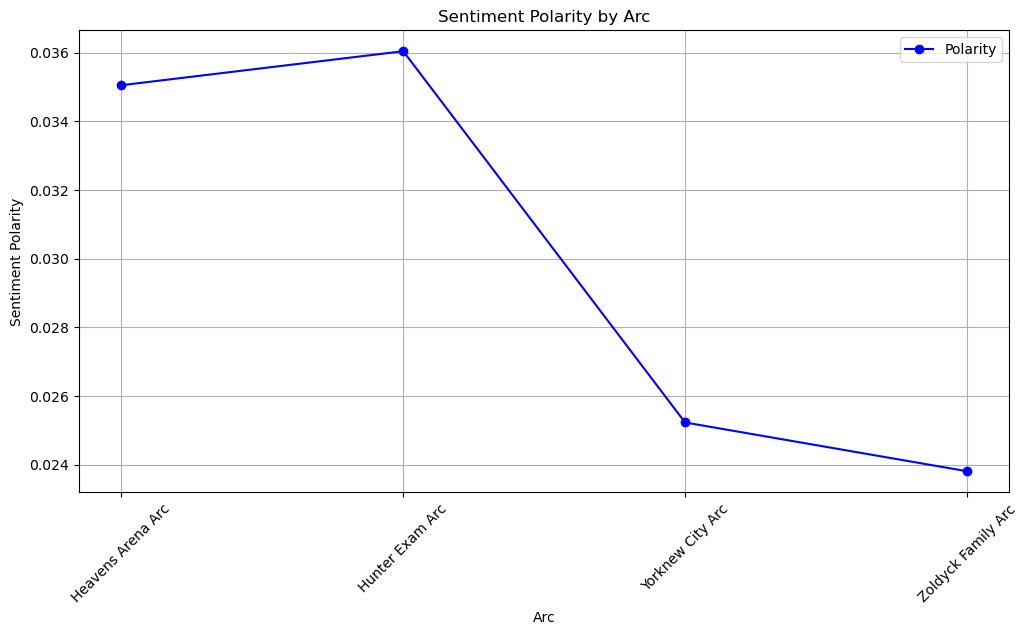

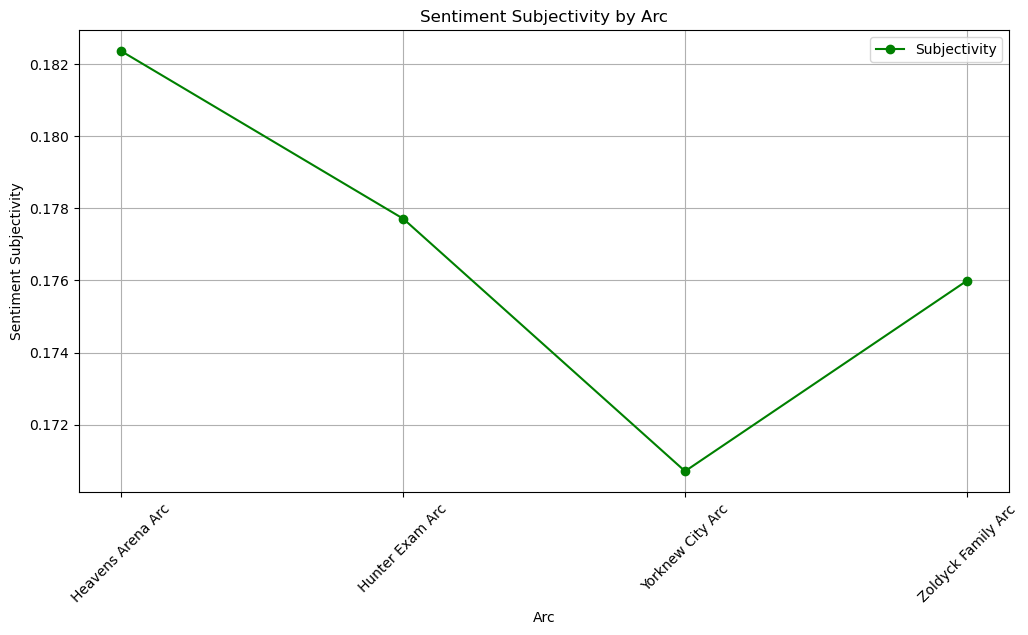

In [16]:
# Define the episode ranges for each arc
arcs = {
    'Hunter Exam Arc': (1, 21),
    'Zoldyck Family Arc': (22, 26),
    'Heavens Arena Arc': (27, 38),
    'Yorknew City Arc': (39, 58),
    'Greed Island Arc': (59, 75),
    'Chimera Ant Arc': (76, 136),
    'Election Arc': (137, 148)
}

# Create a function to assign arcs based on dialogue index
def assign_arc(index):
    episode = index // 1000 + 1  # Approximation: 1000 dialogues per episode
    for arc, (start, end) in arcs.items():
        if start <= episode <= end:
            return arc
    return 'Unknown Arc'

# Assign arcs to each dialogue
df['Arc'] = df.index.map(assign_arc)

# Perform sentiment analysis
df['Sentiment_Polarity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Aggregate sentiment by arc
arc_sentiment = df.groupby('Arc')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean().reset_index()

# Plot sentiment polarity by arc
plt.figure(figsize=(12, 6))
plt.plot(arc_sentiment['Arc'], arc_sentiment['Sentiment_Polarity'], marker='o', label='Polarity', color='blue')
plt.title('Sentiment Polarity by Arc')
plt.xlabel('Arc')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot sentiment subjectivity by arc
plt.figure(figsize=(12, 6))
plt.plot(arc_sentiment['Arc'], arc_sentiment['Sentiment_Subjectivity'], marker='o', label='Subjectivity', color='green')
plt.title('Sentiment Subjectivity by Arc')
plt.xlabel('Arc')
plt.ylabel('Sentiment Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Results

### Sentiment Polarity by Arc


**Explanation**:
- **Hunter Exam Arc**: The sentiment polarity is relatively high, indicating a generally positive tone during this arc.
- **Zoldyck Family Arc**: There is a noticeable drop in polarity, suggesting a shift to a more negative or serious tone.
- **Heavens Arena Arc**: The polarity increases again, indicating a more positive or lighter tone compared to the previous arc.
- **Yorknew City Arc**: The polarity drops significantly, reflecting the darker and more intense events that occur in this arc.

### Sentiment Subjectivity by Arc


**Explanation**:
- **Hunter Exam Arc**: The subjectivity is moderately high, indicating that dialogues in this arc are more subjective or opinion-based.
- **Zoldyck Family Arc**: Subjectivity drops, suggesting a more objective or factual tone in the dialogues.
- **Heavens Arena Arc**: There is a high level of subjectivity, reflecting more personal and emotional dialogues.
- **Yorknew City Arc**: Subjectivity decreases significantly, indicating a shift towards more objective or less emotionally charged dialogues.

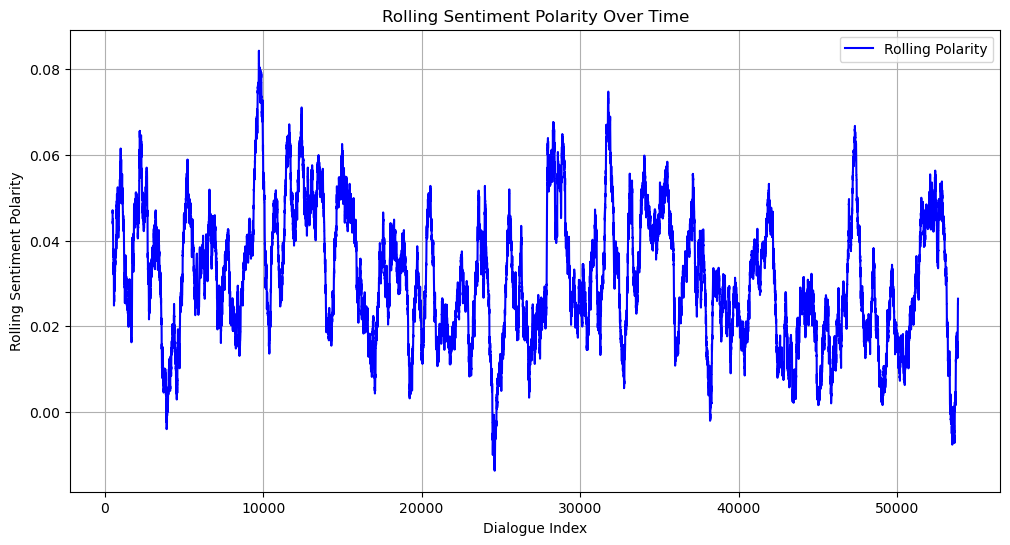

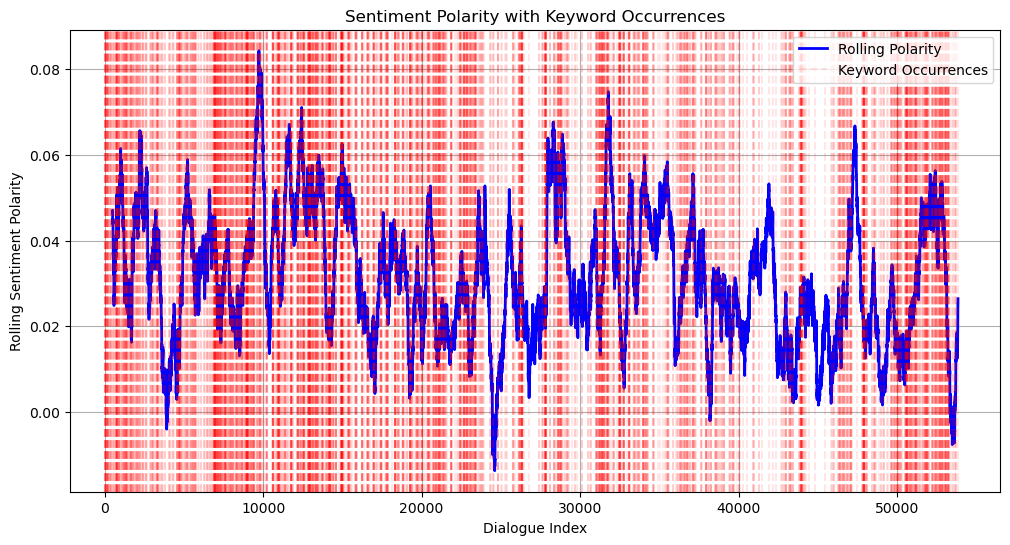

Index: 37, Keywords: ['hunter'], Polarity: 0.2857142857142857, Dialogue: So I can take the Hunter Exam, right?
Index: 54, Keywords: ['hunter'], Polarity: 0.5625, Dialogue: He chose becoming a Hunter over raising you!
Index: 57, Keywords: ['hunter'], Polarity: 0.525, Dialogue: Being a Hunter is so great, he was willing
Index: 81, Keywords: ['hunter'], Polarity: 1.0, Dialogue: best Hunter in the world!
Index: 82, Keywords: ['hunter'], Polarity: 1.0, Dialogue: Once I'm the best Hunter
Index: 84, Keywords: ['hunter'], Polarity: 1.0, Dialogue: The best Hunter in the world?
Index: 187, Keywords: ['hunter'], Polarity: 0.5, Dialogue: There are as many Hunter wannabes
Index: 738, Keywords: ['hunter'], Polarity: 0.3333333333333333, Dialogue: make you worthy to take the Hunter Exam.
Index: 778, Keywords: ['hunter'], Polarity: 0.3333333333333333, Dialogue: worthy Hunter applicants
Index: 803, Keywords: ['hunter'], Polarity: 0.25, Dialogue: My first shot at the Hunter Exam...
Index: 812, Keywords: 

In [18]:
import seaborn as sns
from collections import Counter


# Perform sentiment analysis
df['Sentiment_Polarity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Dialogue'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Calculate rolling mean for sentiment polarity to identify spikes
window_size = 500  # Adjusted window size for smoother sentiment line
df['Rolling_Polarity'] = df['Sentiment_Polarity'].rolling(window=window_size).mean()

# Plot the rolling polarity to visualize sentiment spikes
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Polarity'], label='Rolling Polarity', color='blue')
plt.title('Rolling Sentiment Polarity Over Time')
plt.xlabel('Dialogue Index')
plt.ylabel('Rolling Sentiment Polarity')
plt.grid(True)
plt.legend()
plt.show()

# Define significant keywords related to major plot points and antagonists
keywords = [
    'exam', 'hunter', 'zoldyck', 'arena', 'yorknew', 'greed', 'island', 
    'chimera', 'ant', 'election', 'gon', 'killua', 
    'hisoka', 'phantom', 'troupe', 'kurapika', 'chrollo', 'meruem', 
    'neferpitou', 'shaiapouf', 'menthuthuyoupi', 'kite', 'netero', 
    'ant king', 'gyro'
]

# Detect keywords in the dialogues
def detect_keywords(text, keywords):
    words = text.lower().split()
    return [word for word in words if word in keywords]

df['Keywords'] = df['Dialogue'].apply(lambda x: detect_keywords(x, keywords))

# Filter dialogues with detected keywords
keyword_dialogues = df[df['Keywords'].apply(lambda x: len(x) > 0)]

# Plot sentiment polarity with keyword occurrences (using alpha for transparency)
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Polarity'], label='Rolling Polarity', color='blue', linewidth=2)
for idx in keyword_dialogues.index:
    plt.axvline(x=idx, color='red', linestyle='--', alpha=0.1)
plt.title('Sentiment Polarity with Keyword Occurrences')
plt.xlabel('Dialogue Index')
plt.ylabel('Rolling Sentiment Polarity')
plt.grid(True)
plt.legend(['Rolling Polarity', 'Keyword Occurrences'])
plt.show()

# Extract significant keyword spikes
significant_spikes = keyword_dialogues[keyword_dialogues['Sentiment_Polarity'].abs() > df['Sentiment_Polarity'].std()]

# Display significant keyword spikes
for idx, row in significant_spikes.iterrows():
    print(f"Index: {idx}, Keywords: {row['Keywords']}, Polarity: {row['Sentiment_Polarity']}, Dialogue: {row['Dialogue']}")

# Identifying Key Plot Points in Hunter x Hunter

## Objective

Detect major plot developments and turning points in the Hunter x Hunter anime by using a combination of sentiment analysis and keyword detection. This approach helps to identify spikes in sentiment or the introduction of significant terms, correlating these spikes with major events in the storyline.

## Methodology

### Sentiment Analysis

1. **Sentiment Polarity Calculation**:
    - Each dialogue is analyzed for sentiment using TextBlob, which assigns a polarity score between -1 (very negative) and 1 (very positive).
    - Example: 
        - "I'm so happy!" might have a polarity of 0.8 (positive sentiment).
        - "This is terrible..." might have a polarity of -0.6 (negative sentiment).

2. **Rolling Average**:
    - A rolling window of size 500 dialogues is used to average the sentiment polarity scores.
    - This smoothing helps to highlight general trends and mitigate short-term fluctuations.

### Keyword Detection

1. **Keyword Detection**:
    - Dialogues are scanned for significant keywords that represent major plot points or characters.
    - Keywords include: 'exam', 'hunter', 'zoldyck', 'arena', 'yorknew', 'greed', 'island', 'chimera', 'ant', 'election', 'gon', 'killua', 'hisoka', 'phantom', 'troupe', 'kurapika', 'chrollo', 'meruem', 'neferpitou', 'shaiapouf', 'menthuthuyoupi', 'kite', 'netero', 'ant king', and 'gyro'.
    - When a keyword is detected, it is marked on the plot with a red vertical line.
    - Example:
        - "The Phantom Troupe is here." would trigger a red line because it contains the keyword "phantom troupe".

## Results

### Rolling Sentiment Polarity Over Time

**Explanation**:
- **Objective**: This graph shows the rolling average of sentiment polarity over time to identify overall trends in the emotional tone of the dialogues throughout the series.
- **Y-Axis (Rolling Sentiment Polarity)**: 
    - Values range from negative to positive.
    - **Positive Values**: Indicate positive sentiment in the dialogues.
    - **Negative Values**: Indicate negative sentiment in the dialogues.
    - **Zero Value**: Indicates neutral sentiment.
- **X-Axis (Dialogue Index)**: Represents the sequence of dialogues throughout the series.
    - The index ranges from 0 to around 50,000, meaning there are approximately 50,000 dialogues in the dataset.
- **Methodology**: 
    - **Sentiment Analysis**: Applied using TextBlob to each dialogue, yielding a sentiment polarity score.
    - **Rolling Average**: A rolling window of size 500 is used to smooth the sentiment polarity scores, making it easier to observe general trends and fluctuations.
- **Observation**: 
    - The sentiment polarity fluctuates over time, with several peaks and troughs.
    - **Peaks**: Correspond to dialogues with a higher positive sentiment.
    - **Troughs**: Correspond to dialogues with a higher negative sentiment.

### Sentiment Polarity with Keyword Occurrences

**Explanation**:
- **Objective**: This graph overlays the rolling sentiment polarity with occurrences of significant keywords to correlate sentiment changes with major plot points and character interactions.
- **Y-Axis (Rolling Sentiment Polarity)**: Same as the previous graph, showing the rolling average of sentiment polarity.
- **X-Axis (Dialogue Index)**: Same as the previous graph, representing the sequence of dialogues.
- **Red Vertical Lines**: Indicate occurrences of significant keywords related to major plot points and characters.
    - **Keywords**: Include terms like 'exam', 'hunter', 'zoldyck', 'arena', 'yorknew', 'greed', 'island', 'chimera', 'ant', 'election', 'gon', 'killua', 'hisoka', 'phantom', 'troupe', 'kurapika', 'chrollo', 'meruem', 'neferpitou', 'shaiapouf', 'menthuthuyoupi', 'kite', 'netero', 'ant king', and 'gyro'.
- **Methodology**: 
    - **Keyword Detection**: Dialogues are analyzed for the presence of these keywords. If a keyword is found, the corresponding index is marked with a red vertical line.
- **Observation**: 
    - The overlay of keyword occurrences helps identify specific dialogues that may correspond to key plot points or character moments.
    - **Peaks in Rolling Sentiment Polarity Near Red Lines**: Suggest significant emotional impact associated with these events.
    - For example, a spike in positive sentiment near a keyword related to 'exam' might correspond to a successful moment during the Hunter Exam arc.

## Conclusion

By combining sentiment analysis with keyword detection, these graphs provide a powerful tool to visualize the emotional dynamics of Hunter x Hunter's storyline. The rolling sentiment polarity graph offers a smoothed view of emotional trends, while the keyword occurrences graph correlates these trends with major plot points and character interactions. This method can be extended to other series or textual datasets to gain similar insights into their narrative structure and emotional tone.
in similar insights into their narrative structure and emotional tone.
